## Time-Based Analysis
 ***Dive into the data and look for trends over time***

In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from local storage into a pandas dataframe
htb = pd.read_csv(r"C:/Users/HP/Documents/Azeez/Hotel Booking Analysis/hotel_bookings_clean.csv")

In [3]:
# Set all columns to show
pd.set_option('display.max_columns', None)

# Preview Data
htb.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date
0,Resort Hotel,0,342,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2014-07-24
1,Resort Hotel,0,737,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2013-06-24
2,Resort Hotel,0,7,0,1,1,0,0,Bed & Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No agent,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-24
3,Resort Hotel,0,13,0,1,1,0,0,Bed & Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-18
4,Resort Hotel,0,14,0,2,2,0,0,Bed & Breakfast,GBR,Online TA,Travel Agent/Tour Operator,0,0,0,A,A,0,No Deposit,240.0,Not provided,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-06-17


In [4]:
htb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87229 entries, 0 to 87228
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87229 non-null  object 
 1   is_canceled                     87229 non-null  int64  
 2   lead_time                       87229 non-null  int64  
 3   stays_in_weekend_nights         87229 non-null  int64  
 4   stays_in_week_nights            87229 non-null  int64  
 5   adults                          87229 non-null  int64  
 6   children                        87229 non-null  int64  
 7   babies                          87229 non-null  int64  
 8   meal                            87229 non-null  object 
 9   country                         87229 non-null  object 
 10  market_segment                  87229 non-null  object 
 11  distribution_channel            87229 non-null  object 
 12  is_repeated_guest               

In [5]:
# Change columns 'reservation_status_date', 'arrival_date', 'booking_date' to datetime
htb['reservation_status_date'] = pd.to_datetime(htb['reservation_status_date'])
htb['arrival_date'] = pd.to_datetime(htb['arrival_date'])
htb['booking_date'] = pd.to_datetime(htb['booking_date'])

# Re-check datatypes
htb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87229 entries, 0 to 87228
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87229 non-null  object        
 1   is_canceled                     87229 non-null  int64         
 2   lead_time                       87229 non-null  int64         
 3   stays_in_weekend_nights         87229 non-null  int64         
 4   stays_in_week_nights            87229 non-null  int64         
 5   adults                          87229 non-null  int64         
 6   children                        87229 non-null  int64         
 7   babies                          87229 non-null  int64         
 8   meal                            87229 non-null  object        
 9   country                         87229 non-null  object        
 10  market_segment                  87229 non-null  object        
 11  di

In [6]:
# Create a ordered list of month and days abbrevations. Useful in time-series calculations
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

***Q1: What is the Bookings trend on monthly basis and how do they vary from one another?***

In [7]:
# Count no of bookings for each month, using the .dt to access the month name from 'booking_date'
monthly_bookings = (htb
                    .groupby(htb['booking_date'].dt.strftime('%b')) # Group by month name
                    .size() # Aggregate by count of rows 
                    .reindex(month_order) # Reaarange the index using the ordered month list
                    .to_frame(name='bookings') # Turn result to a dataframe and rename the count column
                    )

# Calculate Percentage Change, fill missing values with 0 and round to 2 decimal place
monthly_bookings['pct_change'] = (monthly_bookings['bookings'].pct_change().fillna(0)*100).round(2)

# Preview result
monthly_bookings.head()

,bookings,pct_change
booking_date,,
Jan,12786,0.00
Feb,10698,-16.33
Mar,8255,-22.84
Apr,6864,-16.85
May,6451,-6.02


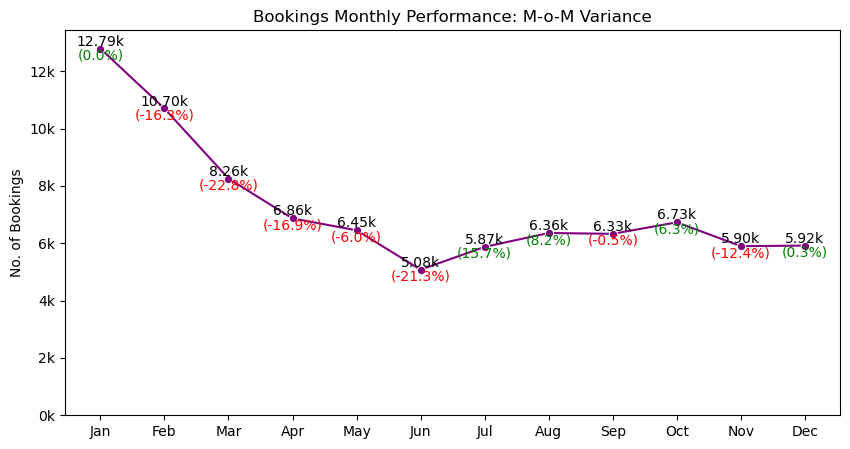

In [8]:
# Set plot size for wider width
plt.figure(figsize=(10,5))

# Plot a line chart
sns.lineplot(data=monthly_bookings, x=monthly_bookings.index, y=monthly_bookings['bookings'], color='purple', marker='o')

# Loop through row of data 'monthly_bookings'
for i, val in enumerate(monthly_bookings['bookings']):
     # Label each point on the chart
     plt.text(i, val, s=f'{val/1000:,.2f}k' if val >= 1000 else val, ha='center', va='bottom')

     # label with the percentage change value beneath the value
     plt.text(i, val, s=f'({monthly_bookings['pct_change'].iloc[i]:,.1f}%)', 
              color='red' if monthly_bookings['pct_change'].iloc[i] < 0 else 'green', ha='center', va='top')  # format color for pct_change 

# Plot styling: Remove excess frame and ticks, apply descriptive title and axis labels
plt.xlabel('')
plt.ylabel('No. of Bookings')
plt.ylim(0, monthly_bookings['bookings'].max()*1.05)   # set y-axis limit
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}k')) # format the y-axis tick-lables
plt.title('Bookings Monthly Performance: M-o-M Variance')

plt.show()

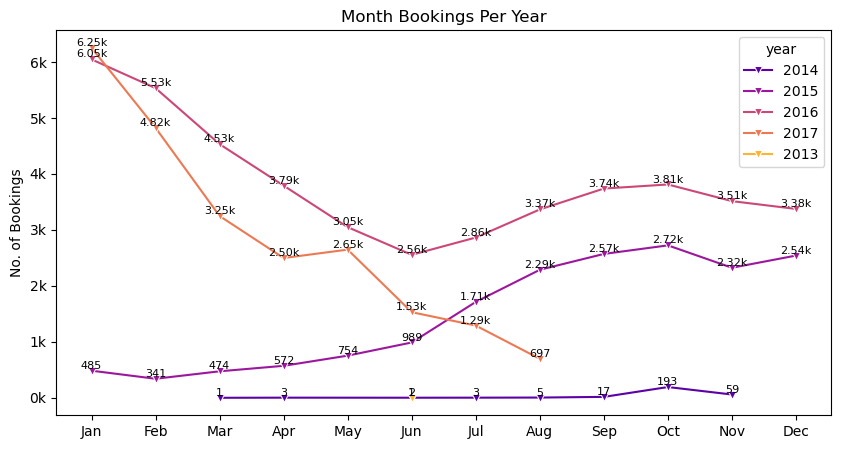

In [9]:
# Set plot size for wider width
plt.figure(figsize=(10,5))

# Calculate no. of bookings per month, per year
year_month_bookings = (htb.groupby([(htb['booking_date'].dt.strftime('%b')).rename('month'), # extract month and rename
                                    htb['booking_date'].dt.strftime('%Y').rename('year')])  # extract year and rename
                                    .size() # calculate count 
                                    .reset_index(name='bookings') # reset index and name value column
                                    )

# Make 'month' column a categorical type for ordering
year_month_bookings['month'] = pd.Categorical(year_month_bookings['month'], categories=month_order, ordered=True)

# Plot line chart
sns.lineplot(data=year_month_bookings, x='month', y='bookings', hue='year', marker='v', palette='plasma')

# Loop through row of data 'monthly_bookings'
for i, val in zip(year_month_bookings['month'], year_month_bookings['bookings']):
     # Label each point on the chart
     plt.text(i, val, s=f'{val/1000:,.2f}k' if val >= 1000 else val, ha='center', va='bottom', size=8)

# Plot styling
plt.ylabel('No. of Bookings')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}k')) # format the y-axis tick-lables
plt.xlabel('')
plt.title('Month Bookings Per Year')

plt.show()


***Q2: Which months have the highest cancellation rates?***

In [10]:
# Get monthly no of bookings and cancellation
monthly_metric = (htb
                  .groupby(htb['booking_date'].dt.strftime('%B'))['is_canceled']
                  .agg(total_bookings='count', total_cancellations='sum')
                  )

# Calcalute cancellation rate (cancellations / bookings), Xply by 100 and round to 2dp
monthly_metric['cancellation_rate'] = ((monthly_metric['total_cancellations'] / monthly_metric['total_bookings'])*100).round(2)

# Preview data
monthly_metric

,total_bookings,total_cancellations,cancellation_rate
booking_date,,,
April,6864,2065,30.08
August,6356,1601,25.19
December,5917,1579,26.69
February,10698,3003,28.07
January,12786,3464,27.09
July,5872,1719,29.27
June,5077,1457,28.70
March,8255,2327,28.19
May,6451,1871,29.00


In [11]:
# Get top 3 cancellation rate
monthly_metric = (monthly_metric
                #   .drop(columns=['total_bookings', 'total_cancellations']) # Optional: Delete total bookings and total cancellation column
                  .nlargest(3, columns='cancellation_rate') # Get the top 3 cancellation rate
                  ).reset_index()   # set result to a dataframe

# Iterate through monthly metric to join month and cancellation together
top_cancel = ", ".join([f'{rate['booking_date']}({rate['cancellation_rate']}%)' for index, rate in monthly_metric.iterrows()]) 

# Print result
print(f'The month {top_cancel} were the top 3 with the highest cancellation rate')

The month April(30.08%), July(29.27%), May(29.0%) were the top 3 with the highest cancellation rate


***Q3: How has the Average Daily Rate (ADR) changed across months and years?***

*Note: ADR (Average Daily Rate) reflects actual revenue per night, so only guests who completed their stay (i.e., reservation_status = 'Check-Out') are considered in the calculation.*

In [12]:
# Filter data for only bookings that checked-out
check_outs = htb[htb['reservation_status']=='Check-Out'].copy()
# Preview data
check_outs.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date
0,Resort Hotel,0,342,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2014-07-24
1,Resort Hotel,0,737,0,0,2,0,0,Bed & Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No agent,Not provided,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2013-06-24
2,Resort Hotel,0,7,0,1,1,0,0,Bed & Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No agent,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-24
3,Resort Hotel,0,13,0,1,1,0,0,Bed & Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,Not provided,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-18
4,Resort Hotel,0,14,0,2,2,0,0,Bed & Breakfast,GBR,Online TA,Travel Agent/Tour Operator,0,0,0,A,A,0,No Deposit,240.0,Not provided,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-06-17


In [13]:
# Get average of adr on a month_year basis
monthly_adr = check_outs.groupby(check_outs['booking_date'].dt.to_period('M'))['avg_daily_rate'].mean().round(2)

# Preview result
monthly_adr

booking_date
2013-06      0.00
2014-03     68.00
2014-04     86.58
2014-06     89.68
2014-07     63.47
2014-08    131.20
2014-09    108.83
2014-10     76.92
2014-11    110.37
2015-01     72.26
2015-02     92.75
2015-03     93.20
2015-04     99.57
2015-05    114.95
2015-06    121.03
2015-07     99.70
2015-08     96.23
2015-09     94.13
2015-10     76.80
2015-11     66.74
2015-12     74.66
2016-01     80.36
2016-02     89.99
2016-03     97.73
2016-04    105.63
2016-05    114.10
2016-06    125.56
2016-07    131.23
2016-08    122.36
2016-09    101.86
2016-10     92.14
2016-11     87.45
2016-12     90.53
2017-01     96.13
2017-02    103.54
2017-03    118.07
2017-04    134.62
2017-05    132.77
2017-06    149.34
2017-07    165.47
2017-08    171.48
Freq: M, Name: avg_daily_rate, dtype: float64

NOTE:
1. I noticed some missing months, hence, the need to generate a complete date(month-year) to effectively show adr trend across month of each year
2. The date range should start from 2024 since there are no substantial records for 2023 (only 1 booking with 0 adr)

In [14]:
# Generate a complete date using the original data table 'htb' and a month frequency
all_months = pd.period_range(htb["booking_date"].min(), htb["booking_date"].max(), freq="M")
all_months

PeriodIndex(['2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11',
             '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05',
             '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11',
             '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05',
             '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11',
             '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
             '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
             '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
             '2017-06', '2017-07', '2017-08'],
            dtype='period[M]')

In [15]:
# Reindex 'monthly_adr' with generated date list, making sure there's no missing date
monthly_adr = (monthly_adr.reindex(all_months)
               .rename_axis('month_year')   # rename axis for readability
               .reset_index()   # reset index and turn to a dataframe
                )

# Fill up missing values with 0 and enforce data type
monthly_adr['avg_daily_rate'] = monthly_adr['avg_daily_rate'].fillna(0).convert_dtypes()

# Format 'month_year' for better readability
monthly_adr['month_year'] = monthly_adr['month_year'].dt.strftime('%b-%Y')

# Preview result
monthly_adr.head(20)


,month_year,avg_daily_rate
0,Jun-2013,0.0
1,Jul-2013,0.0
2,Aug-2013,0.0
3,Sep-2013,0.0
4,Oct-2013,0.0
5,Nov-2013,0.0
6,Dec-2013,0.0
7,Jan-2014,0.0
8,Feb-2014,0.0
9,Mar-2014,68.0


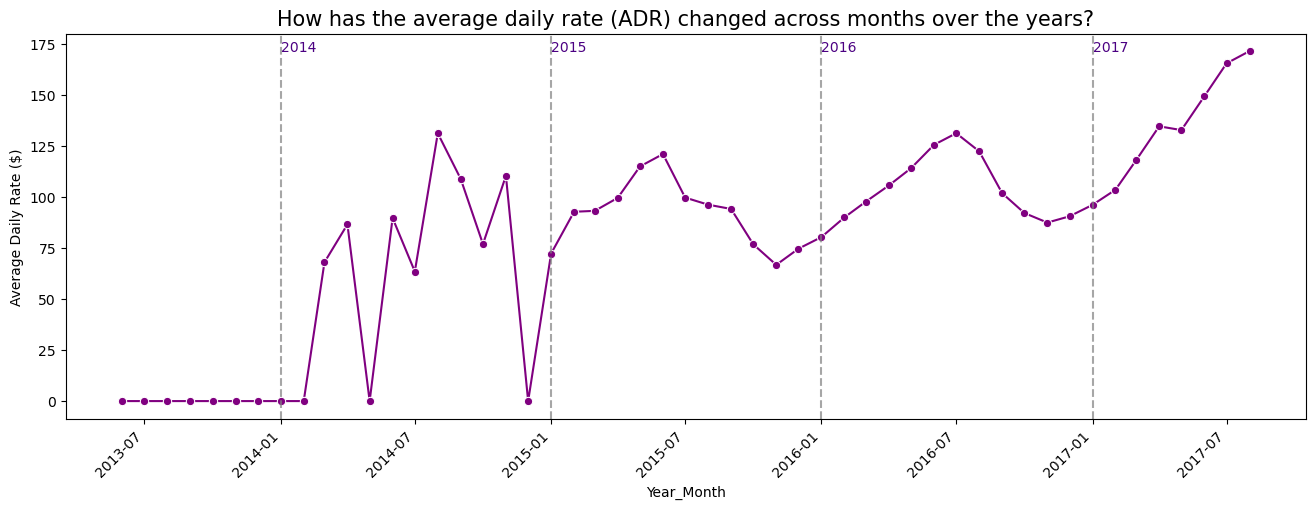

In [16]:
# Set plot size
plt.figure(figsize=(16,5))

# Convert 'month_order' to a datetime data_type for plotting
monthly_adr['month_year'] = pd.to_datetime(monthly_adr['month_year'], format='%b-%Y')

# Plot line chart
ax = sns.lineplot(data=monthly_adr, x= 'month_year', y='avg_daily_rate', marker='o', color='purple')

# ADD VERTICAL LINES FOR THE FIRST MONTH OF EACH YEAR
# Get tick positions and labels for vertical lines
tick_pos = monthly_adr[monthly_adr['month_year'].dt.month == 1]['month_year']   # filter for only january months
tick_label = tick_pos.dt.year # get the year label for the filtered months

# Add vertical lines
for tick, label in zip(tick_pos, tick_label):
    ax.axvline(tick, color="gray", linestyle="--", alpha=0.7)   # set tick position for lines
    ax.text(tick, monthly_adr['avg_daily_rate'].max(), s=label, color='indigo')    # set labels and their locations

# Plot styling: Apply descriptive title and axis labels, set tick styles
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Daily Rate ($)')
plt.xlabel('Year_Month')
plt.title('How has the average daily rate (ADR) changed across months over the years?',size=15)

plt.show()

***Q4: Do lead times vary by season (e.g., summer vs. winter)?***

In [17]:
# Function to group month into respective seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Create a new column 'season' using the above function
htb['season'] = htb['booking_date'].dt.month.map(get_season)

# Create the average lead time for each season of each year
season_metric = (htb.groupby([htb['booking_date'].dt.year,'season'])['lead_time']
                 .mean()    # aggregation: average
                 .round(0)  # round up 
                 .astype(int)   # force data type integer
                 .reset_index() # reset_index
                 )
# Preview data
season_metric

,booking_date,season,lead_time
0,2013,Summer,737
1,2014,Autumn,306
2,2014,Spring,540
3,2014,Summer,356
4,2015,Autumn,86
5,2015,Spring,122
6,2015,Summer,70
7,2015,Winter,120
8,2016,Autumn,87
9,2016,Spring,82


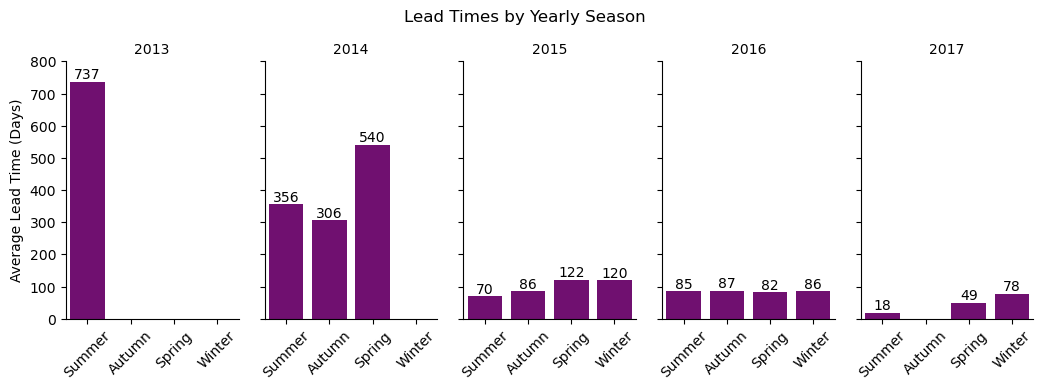

In [18]:
# Plot multiple bar chart
ax = sns.catplot(data=season_metric, x= 'season', y='lead_time', kind='bar', 
                 col='booking_date', height=3.5, aspect=.6, color='purple')

# Loop through each subplot
for a in ax.axes.flat:
    # Add bar labels
    for bars in a.containers:
        a.bar_label(bars)

# Plot styling
ax.set_xticklabels(rotation=45)
ax.set_ylabels('Average Lead Time (Days)')
ax.set_xlabels('')
ax.set_titles("{col_name}") # set subplot titles to the value used to split
ax.set(ylim=(0, 800))
plt.suptitle('Lead Times by Yearly Season', y=1.05)

plt.show()

***Q5: What is the distribution of bookings across years 2014, 2015, 2016 , 2017?***

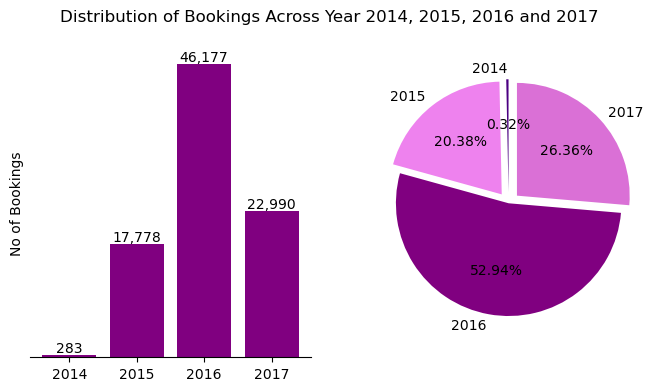

In [19]:
# Set no. of subplots and plot size
fig, ax = plt.subplots(1, 2, figsize=(8,4))

years = [2014, 2015, 2016, 2017]    # List of years needed for distribution

# Filter dataframe to only show data for listed years
filtered_htb = htb[(htb['booking_date'].dt.year).isin(years)] 

# Calculate no of bookings per listed years
year_bookings = filtered_htb.groupby(filtered_htb['booking_date'].dt.year).size()

# First axis: Plot bar chart to show the no of bookings
bar = ax[0].bar(x=year_bookings.index, height=year_bookings.values, color='purple')
ax[0].bar_label(bar, fmt='{:,.0f}')
ax[0].set_yticks([])
ax[0].set_ylabel('No of Bookings')
sns.despine(left=True) # Remove chart border lines

# Second axis: Plot a pie chart to show percentage distribution of bookings
ax[1].pie(year_bookings, labels=years, autopct='%.2f%%', startangle=90, 
          explode=[0.1, 0.1, 0, 0.1], colors=['indigo', 'violet', 'purple', 'orchid'])

fig.suptitle('Distribution of Bookings Across Year 2014, 2015, 2016 and 2017') # Set plot title

plt.show()

***Q6: How does ADR fluctuate by weekday vs. weekend?***

*Note: ADR (Average Daily Rate) reflects actual revenue per night, so only guests who completed their stay (i.e., reservation_status = 'Check-Out') are considered in the calculation.*<br>
*Therefore, we use the **Check-outs** dataframe*

In [20]:
# Define days of weekend
weekend = ['Saturday', 'Sunday']

# create a new column 'day_type' based on day name
check_outs['day_type'] = (check_outs['arrival_date'].dt.day_name()
                          .apply(lambda x: 'Weekend' if x in weekend else 'Weekday'))

# get average daily rate for each day type
adr = check_outs.groupby('day_type')['avg_daily_rate'].mean()

# print adr for each day type
for i, val in adr.items():
    print(f'The Average Daily Rate During {i}s are ${val:.2f}')

The Average Daily Rate During Weekdays are $101.43
The Average Daily Rate During Weekends are $104.25


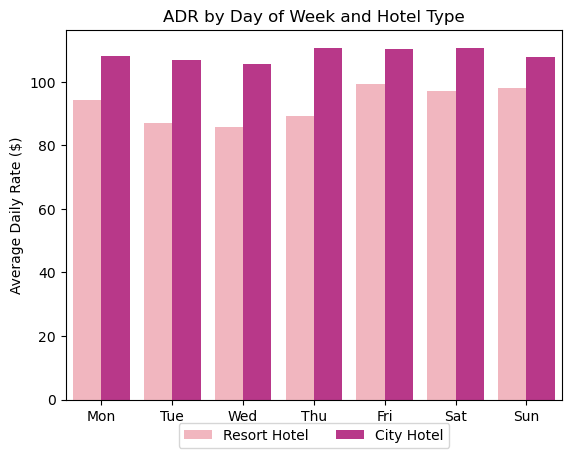

In [21]:
# Plot bar chart to show daily trend across hotel type
# Use seaborn as aggregation to be done is 'mean' which is also default
sns.barplot(data=check_outs, x=check_outs['arrival_date'].dt.strftime('%a'), y='avg_daily_rate', 
            order=day_order, hue='hotel', errorbar=None, palette='RdPu')

# Plot Styling
plt.title('ADR by Day of Week and Hotel Type')
plt.xlabel('')
plt.ylabel('Average Daily Rate ($)')
plt.legend(loc='lower center', ncol=2, title="", bbox_to_anchor=(0.5, -0.15))

plt.show()

***Q7: Are there any seasonal peaks for Resort vs. City hotel?***

In [22]:
# Get number of bookings for each hotel, season
seasonal_bookings = (htb.groupby(['hotel', 'season'])
                     .size()    # get count of rows
                     .reset_index(name='bookings')  # reset index and rename value column
                     )

# Get number of arrivals for each hotel, season
seasonal_arrivals = (htb[htb['reservation_status'] == 'Check-Out']  # filter for only bookings with checkout (NB: The check_outs data could also be used)
                     .groupby(['hotel', 'season'])  # group by hotel and season
                     .size()    # get count of rows
                     .reset_index(name='arrivals')  # reset index and rename value column
                     )

# Merge seasonal bookings and seasonal arrivals
seasonal_metric = pd.merge(seasonal_bookings, seasonal_arrivals, on=['hotel', 'season'], how='left').fillna(0)

seasonal_metric

,hotel,season,bookings,arrivals
0,City Hotel,Autumn,11094,7826
1,City Hotel,Spring,13566,9311
2,City Hotel,Summer,10190,7310
3,City Hotel,Winter,18424,12792
4,Resort Hotel,Autumn,7859,6204
5,Resort Hotel,Spring,8004,5996
6,Resort Hotel,Summer,7115,5218
7,Resort Hotel,Winter,10977,8563


In [23]:
# Unpivot seasonal_metric to make it suitable for visualization
unp_seasonal_metric = seasonal_metric.melt(id_vars=['hotel', 'season'], value_vars=['bookings', 'arrivals'],
                                           var_name='type', value_name='count')
unp_seasonal_metric.head(10)


,hotel,season,type,count
0,City Hotel,Autumn,bookings,11094
1,City Hotel,Spring,bookings,13566
2,City Hotel,Summer,bookings,10190
3,City Hotel,Winter,bookings,18424
4,Resort Hotel,Autumn,bookings,7859
5,Resort Hotel,Spring,bookings,8004
6,Resort Hotel,Summer,bookings,7115
7,Resort Hotel,Winter,bookings,10977
8,City Hotel,Autumn,arrivals,7826
9,City Hotel,Spring,arrivals,9311


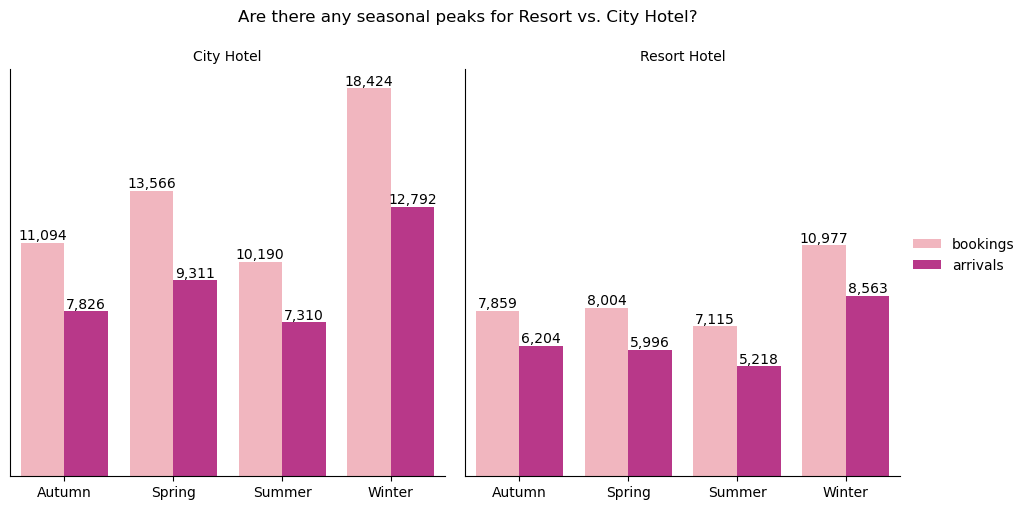

In [24]:
# Plot multiple bar chart
ax = sns.catplot(data=unp_seasonal_metric, kind='bar', x='season', y='count', hue='type', col='hotel', palette='RdPu')

# Loop through each subplot (Axes)
for a in ax.axes.flat:
    # Add bar labels
    for bars in a.containers:
        a.bar_label(bars, fmt='{:,.0f}')

# Plot Styling
plt.suptitle('Are there any seasonal peaks for Resort vs. City Hotel?', y=1.05)
ax.set_titles("{col_name}") # set subplot titles to the value used to split
plt.gca().yaxis.set_ticks([])
ax.set_ylabels('')
ax.set_xlabels('')
sns.despine()

# Format legend
ax._legend.set_title('')

plt.show()

***Q8: What’s the trend in family vs. solo traveler bookings over time?***

In [25]:
# New column: 'traveler type' based on no. of adults, children and babies
htb['traveler_type'] = htb.apply(
    lambda row: 'Family'
        if (row['adults'] >= 1) and ((row['children'] >= 1) or (row['babies'] >= 1)) # if there's atleast 1 adult and 1 child or baby
    else 'Couples/Duo'
        if (row['adults'] == 2) and (row['children'] == 0 and row['babies'] == 0) # if there are only 2 adults
    else 'Group'
        if (row['adults'] > 2) and (row['children'] == 0 and row['babies'] == 0) # if there are more than 2 adults
    else 'Solo',
    axis=1
)

In [26]:
# Get no. of bookings for each month, traveler_type
group_bookings = (htb.groupby([htb['booking_date'].dt.strftime('%b'), 'traveler_type'])
                  .size()   # aggregation is count of rows
                  .reset_index(name='bookings') # reset index and rename value column
                  )

# Make 'booking_date' a categorical datatype for easy/custom sorting order
group_bookings['booking_date'] = pd.Categorical(group_bookings['booking_date'], categories=month_order, ordered=True)

# Sort booking_date for view
group_bookings = group_bookings.sort_values('booking_date').reset_index(drop=True)

# Create a list of 'traveler type' needed for analysis
group_list= ['Family', 'Solo']

# Filter and copy 'group_bookings' into another dataframe
fam_solo_bookings = group_bookings[group_bookings['traveler_type'].isin(group_list)].copy().reset_index(drop=True)
fam_solo_bookings.head()

,booking_date,traveler_type,bookings
0,Jan,Solo,2014
1,Jan,Family,1183
2,Feb,Solo,1753
3,Feb,Family,1184
4,Mar,Solo,1572


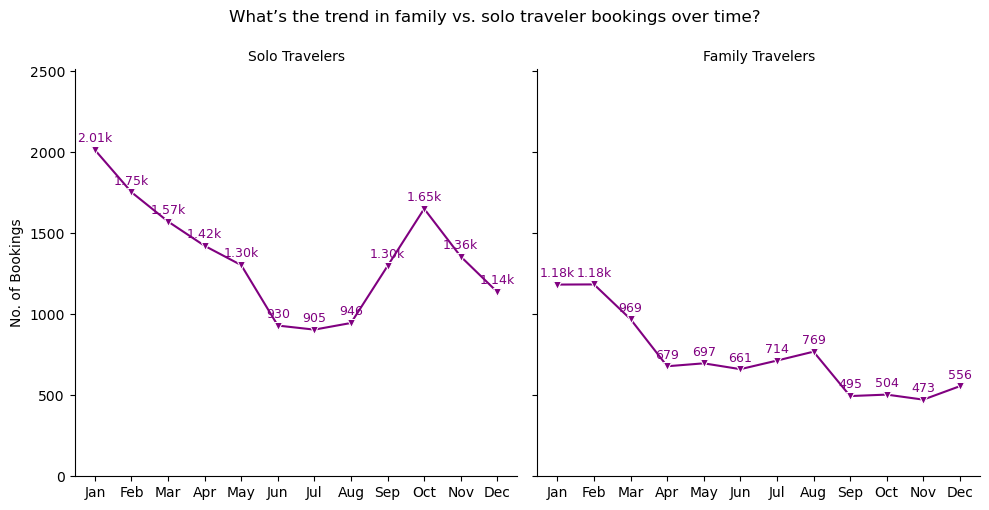

In [27]:
# Plot multiple line plots 
ax = sns.relplot(data=fam_solo_bookings, kind='line', x='booking_date', y='bookings', col='traveler_type', marker='v', color='purple')

# Loop through subplots and label each point
for a, traveler in zip(ax.axes.flat, fam_solo_bookings['traveler_type'].unique()):
    subset = fam_solo_bookings[fam_solo_bookings['traveler_type'] == traveler] # a dataframe for each subplot
    for x, y in zip(subset['booking_date'], subset['bookings']):
        a.text(x=x, y=y+50, s=f'{y/1000:,.2f}k' if y >= 1000 else y, ha='center', color='purple', size=9)

# Plot Styling
plt.suptitle('What’s the trend in family vs. solo traveler bookings over time?', y=1.05)
ax.set_titles("{col_name} Travelers") # set subplot titles to the value used to split
ax.set_ylabels('No. of Bookings')
ax.set_xlabels('')
plt.ylim(0, fam_solo_bookings['bookings'].max()+500) # set yaxis limit

plt.show()

***Q9: Are cancellations increasing or decreasing over the years?***

In [28]:
# Get no of bookings and cancellation yearly
yearly_metric = (htb.groupby(htb['booking_date'].dt.strftime('%Y'))['is_canceled']
                 .agg(total_bookings='count', total_cancellations='sum'))

# Calcalute cancellation rate. (cancellations / bookings) * 100
yearly_metric['cancellation_rate'] = ((yearly_metric['total_cancellations'] / yearly_metric['total_bookings'])*100).round(2)
yearly_metric

,total_bookings,total_cancellations,cancellation_rate
booking_date,,,
2013,1,0,0.00
2014,283,196,69.26
2015,17778,3837,21.58
2016,46177,13584,29.42
2017,22990,6392,27.80


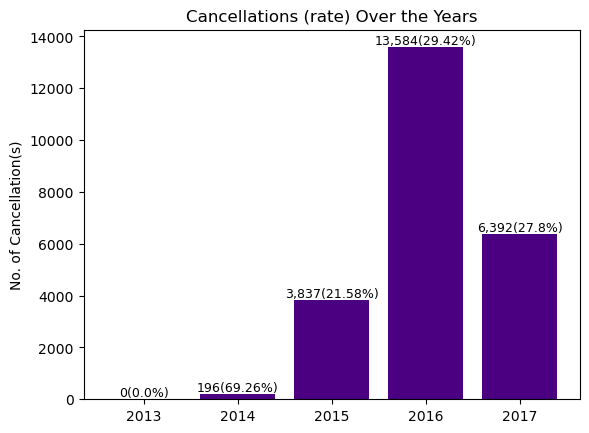

In [29]:
# Plot a bar chart
plt.bar(yearly_metric.index, yearly_metric['total_cancellations'], color='indigo')

# Add labels to bar and format
for i, rate in zip(yearly_metric.index, yearly_metric['total_cancellations']):
    plt.text(i, rate+100, s=f'{rate:,.0f}({yearly_metric['cancellation_rate'].loc[i]}%)', ha='center', size=9)

# Plot styling
plt.title('Cancellations (rate) Over the Years')
plt.ylabel('No. of Cancellation(s)')

plt.show()